In [13]:
#Importar librerías
import numpy as np
import pylab as plt
from pylab import show,plot,subplot,xlim,ylim,title,legend,xlabel,ylabel,figure

In [21]:
H=float(input('Por favor digite la altura inicial entre 1000 y 50000: ' ))

Por favor digite la altura inicial entre 1000 y 50000: 1000


In [22]:
#Lectura de los datos dados por el fabricante
DatosF=np.loadtxt('LaserLCPCA.txt')

#Ajuste de los datos redondeados a 4 decimales
DatosF[:,0]=10000000/DatosF[:,0]
DatosF=np.round(DatosF,4)

#Lectura de los datos dados por Hitran
DatosH=np.loadtxt('XSCO2Voigt_1000_296.0_1.0.txt')

#Ajuste de los datos redondeados a 4 decimales el WN
DatosH[:,0]=np.round(DatosH[:,0],4)

#Obtención de las dimensiones de las matrices guardadas
c,d=np.shape(DatosF)
e,f=np.shape(DatosH)

#Creación de los vectores para hacer el barrido
a=np.arange(0,c,1)
b=np.arange(0,e,1)

#Filtrar los Numeros de onda del Fabricante que están en los datos de Hitran
XSHn=np.zeros((c,2))
for i in a:
    for j in b:
        if DatosF[i,0]==DatosH[j,0]: #Números de onda iguales
            XSHn[i,0] = DatosH[j,0]
            XSHn[i,1] = DatosH[j,1]
            
np.savetxt('HXs.txt', XSHn, fmt='%f')

h=np.arange(1000,52000,1000).reshape(51,1)
g=len(h)
g1=np.arange(0,g,1)

h_P_T=np.loadtxt('h_P_T.txt')

for i in g1:
    if h_P_T[i,0]==H:
        P=h_P_T[i,1]     #Obtención de presión para la altura en estudio
        T=h_P_T[i,2]     #Obtención de temperatura para la altura en estudio

1000.0


In [23]:
#Constantes

ANR=0.801   #10 rebotes y 97.8108 de reflectancia
NDA=416     #Partes por millón 
DRH=200     #d=Rebotes*2f; f=distancia focal(100[mm]); Rebotes=10
FCF=0.00197 #PMF/PLF

In [24]:
NDA=(2.46e13*P*296/T)*NDA #NDA en [molec/cm^3]

#Corriente de Polarización del Láser (CorrPL)
CorrPL=np.zeros((1,c))
CorrPL=DatosF[:,1]

#Sección Cruzada de Absorción (SecCA)
SecCA=np.zeros((1,c))
SecCA=XSHn[:,1]

#Potencia Salida del Láser (PotSL)
PotSL=np.zeros((1,c))
PotSL=DatosF[:,2]

In [25]:
#Simulación del sistema de sensado

#Potencia Salida de la Celda (PotSC)
PotSC=np.zeros((1,c))
PotSC=PotSL[:]*ANR

#Potencia de LLegada al FototReceptor (PotLF)
PotLF=np.zeros((1,c))
PotLFdbm=np.zeros((1,c))
PotLF[0,:]=PotSC[:]*np.exp(-SecCA[:]*NDA*DRH)
PotLFdbm[0,:]=10*np.log10(PotLF[0,:])

#Absorbancia sin el efecto de la atenuación de los rebotes
Abs=np.zeros((1,c))
Abs[0,:]=np.log((ANR*PotSL[:])/PotLF[0,:])

Text(0, 0.5, 'Power In Photoreceptor [mW]')

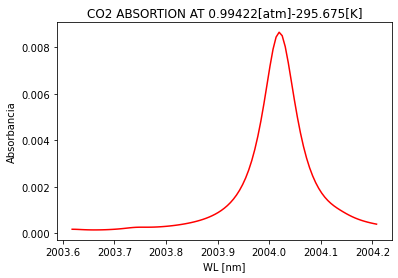

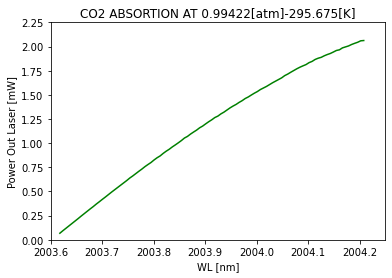

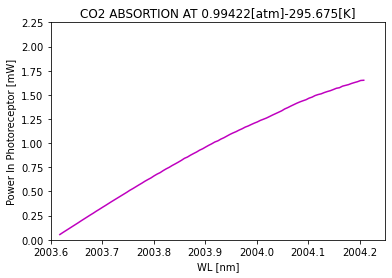

In [26]:
#Grafica de la absorbancia

DatosF=np.loadtxt('LaserLCPCA.txt', skiprows=0)
LongO=DatosF[:,0]

figure(1)
plt.title('CO2 ABSORTION AT 0.99422[atm]-295.675[K]')
plt.plot(LongO[:],Abs[0,:], 'r')
plt.xlabel('WL [nm]')
plt.ylabel('Absorbancia')
figure(2)
plt.title('CO2 ABSORTION AT 0.99422[atm]-295.675[K]')
plt.plot(LongO[:],PotSL[:], 'g')
plt.xlim(2003.6,2004.25)
plt.ylim(0,2.25)
plt.xlabel('WL [nm]')
plt.ylabel('Power Out Laser [mW]')
figure(3)
plt.title('CO2 ABSORTION AT 0.99422[atm]-295.675[K]')
plt.plot(LongO[:],PotLF[0,:], 'm')
plt.xlim(2003.6,2004.25)
plt.ylim(0,2.25)
plt.xlabel('WL [nm]')
plt.ylabel('Power In Photoreceptor [mW]')